In [17]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
#loading data into dataframe
df = pd.read_csv('Desktop/FinalProjectPGAToutData.csv')

# Examining the first 5 rows of data
print(df.head())

      Player Name  Year  Rounds Played in Year  Average Fairway Percentage  \
0  Henrik Stenson  2018                     60                       75.19   
1     Ryan Armour  2018                    109                       73.58   
2     Chez Reavie  2018                     93                       72.24   
3      Ryan Moore  2018                     78                       71.94   
4    Brian Stuard  2018                    103                       71.44   

   Average Driving Distance  Average GIR  Average Putts  Average Scrambling  \
0                     291.5        73.51          29.93               60.67   
1                     283.5        68.22          29.31               60.13   
2                     286.5        68.67          29.12               62.27   
3                     289.2        68.80          29.17               64.16   
4                     278.9        67.12          29.11               59.23   

   Average Score  Average SG Putts  Average SG Total  SG

In [19]:
#looking at general data information
df.info

<bound method DataFrame.info of          Player Name  Year  Rounds Played in Year  Average Fairway Percentage  \
0     Henrik Stenson  2018                     60                       75.19   
1        Ryan Armour  2018                    109                       73.58   
2        Chez Reavie  2018                     93                       72.24   
3         Ryan Moore  2018                     78                       71.94   
4       Brian Stuard  2018                    103                       71.44   
...              ...   ...                    ...                         ...   
1673  Phil Mickelson  2010                     76                       52.66   
1674       John Daly  2010                     63                       52.21   
1675    Jimmy Walker  2010                     82                       51.29   
1676   Daniel Chopra  2010                     74                       51.27   
1677   Martin Flores  2010                     75                       50.15

In [20]:
#checking size of data from csv file
df.shape

(1678, 15)

In [21]:
# Chnaging all empty or non values to 0's and changing incorrect variable typings
df['Top 10 Placements'].fillna(0, inplace=True)
df['Top 10 Placements'] = df['Top 10 Placements'].astype(int)
df.dropna(axis = 0, inplace=True)
df['Rounds Played in Year'] = df['Rounds Played in Year'].astype(int)

In [22]:
#checking if changes to feature types are correct and whether any other chnages need to be made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player Name                 1678 non-null   object 
 1   Year                        1678 non-null   int64  
 2   Rounds Played in Year       1678 non-null   int32  
 3   Average Fairway Percentage  1678 non-null   float64
 4   Average Driving Distance    1678 non-null   float64
 5   Average GIR                 1678 non-null   float64
 6   Average Putts               1678 non-null   float64
 7   Average Scrambling          1678 non-null   float64
 8   Average Score               1678 non-null   float64
 9   Average SG Putts            1678 non-null   float64
 10  Average SG Total            1678 non-null   float64
 11  SG:OTT                      1678 non-null   float64
 12  SG:APR                      1678 non-null   float64
 13  SG:ARG                      1678 

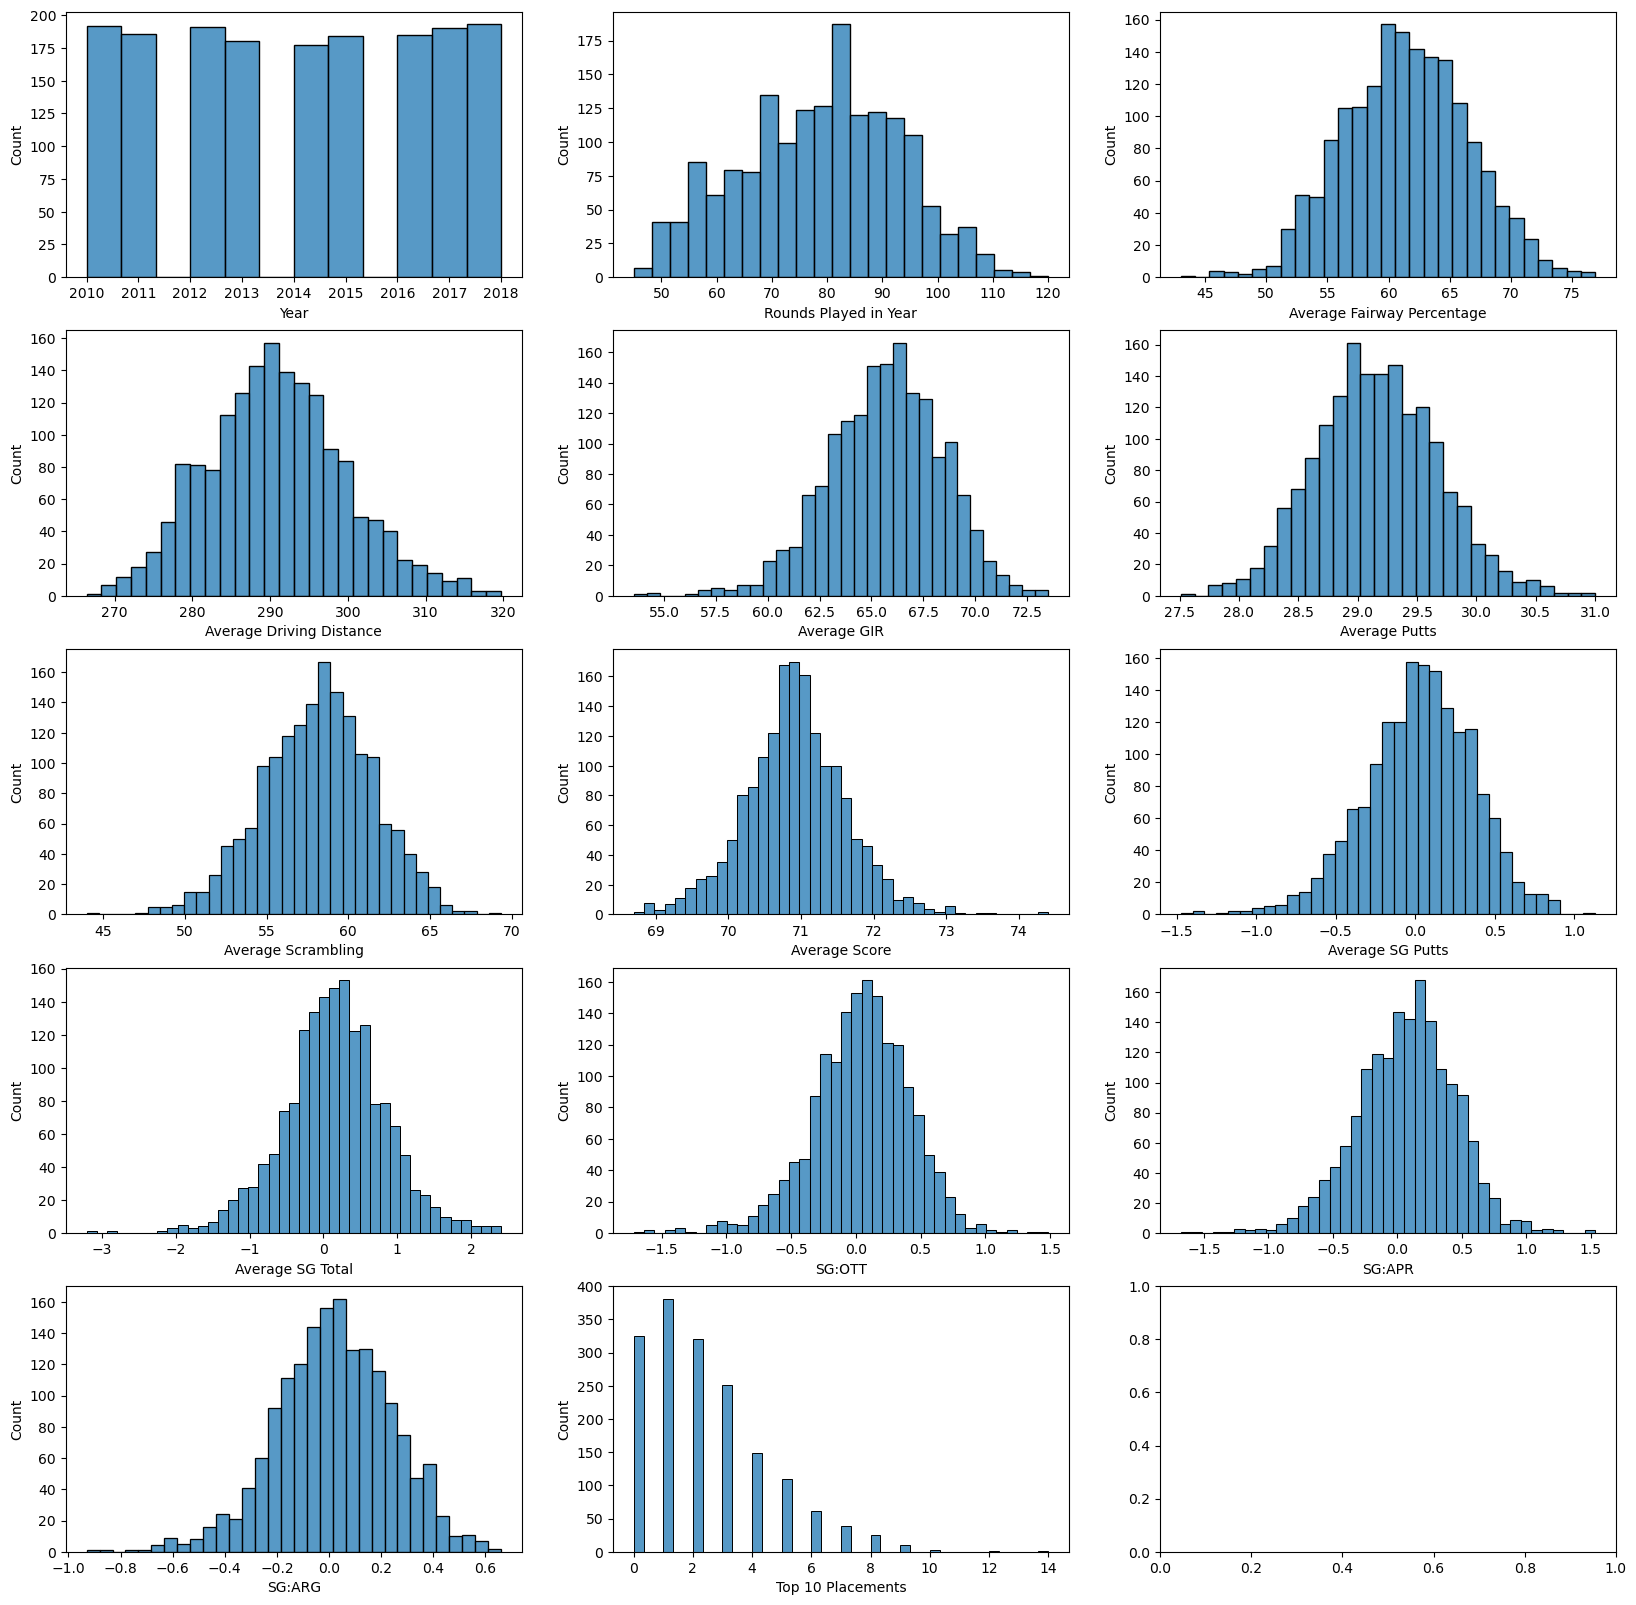

In [28]:
#data distribution
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.histplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [29]:
# Creating a definition for the players that had atleast one top 10 placement in a year
upperEchelonPlayers = df.loc[df['Top 10 Placements'] >= 1, :]
print(upperEchelonPlayers.head())

      Player Name  Year  Rounds Played in Year  Average Fairway Percentage  \
0  Henrik Stenson  2018                     60                       75.19   
1     Ryan Armour  2018                    109                       73.58   
2     Chez Reavie  2018                     93                       72.24   
3      Ryan Moore  2018                     78                       71.94   
4    Brian Stuard  2018                    103                       71.44   

   Average Driving Distance  Average GIR  Average Putts  Average Scrambling  \
0                     291.5        73.51          29.93               60.67   
1                     283.5        68.22          29.31               60.13   
2                     286.5        68.67          29.12               62.27   
3                     289.2        68.80          29.17               64.16   
4                     278.9        67.12          29.11               59.23   

   Average Score  Average SG Putts  Average SG Total  SG

IndexError: index 6 is out of bounds for axis 0 with size 6

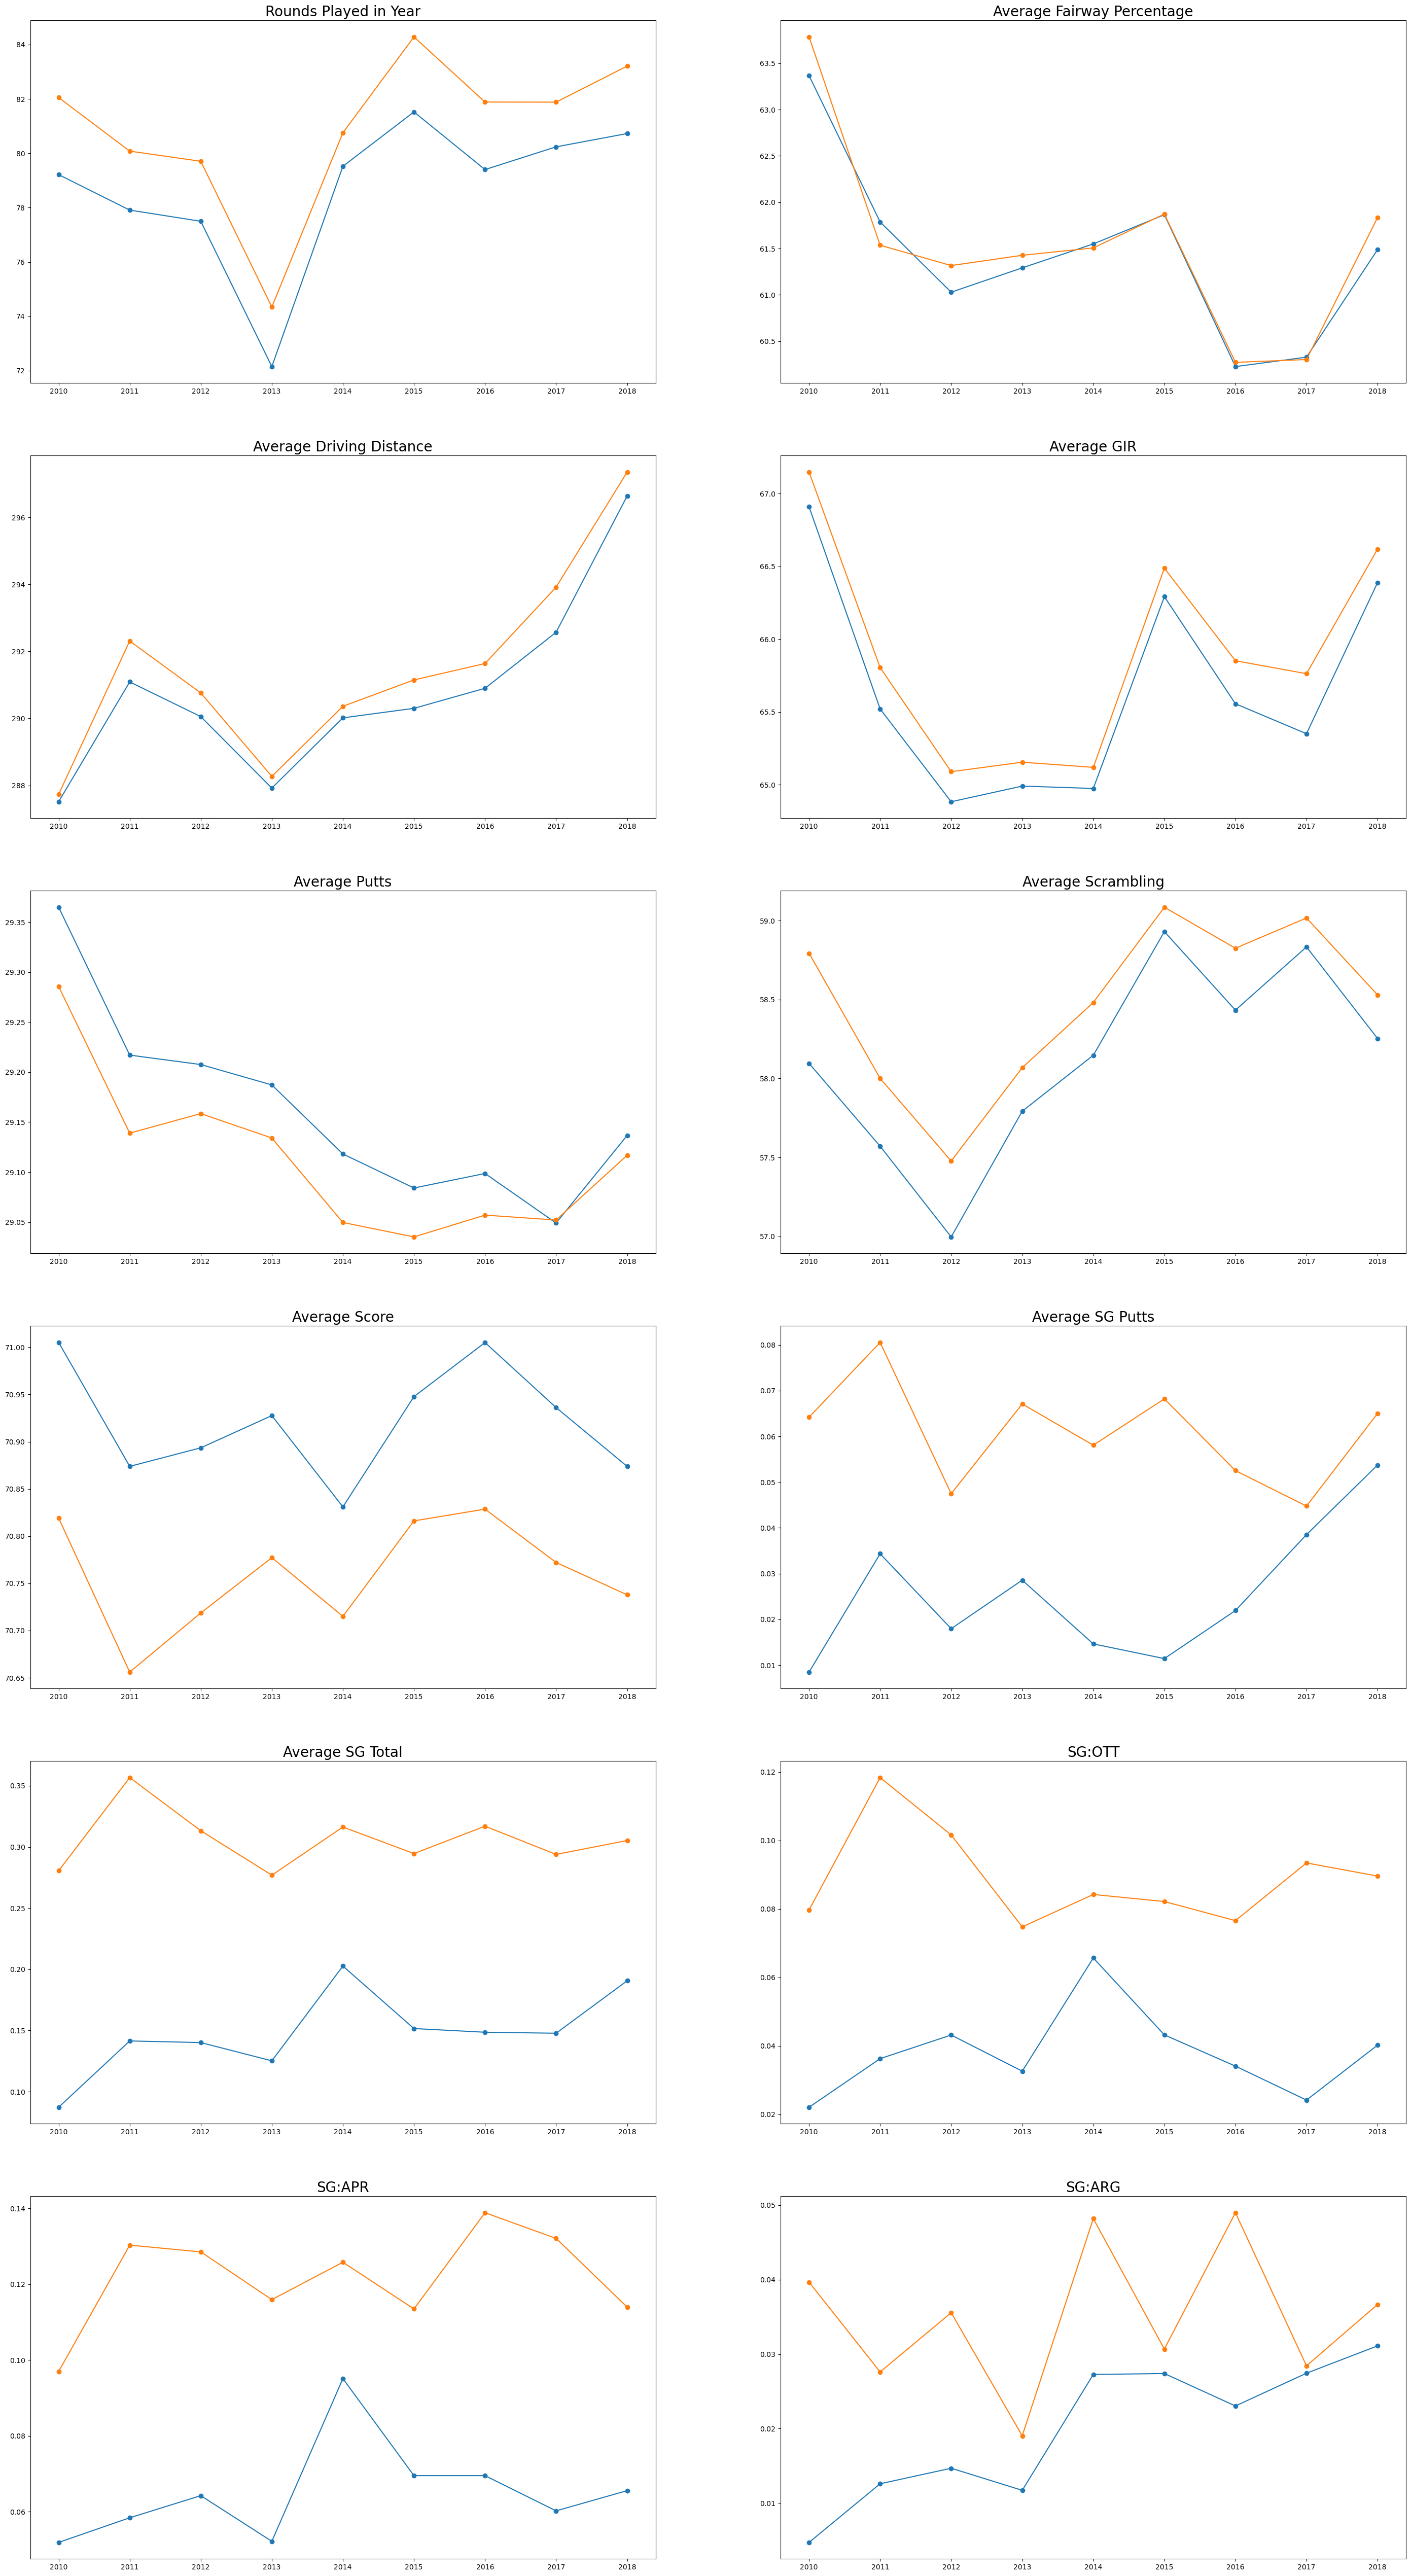

In [32]:
f, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(35,65))
distribution = df.loc[:,df.columns!='Player Name'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(distribution):
    avg = df.groupby('Year')[column].mean()
    best = upperEchelonPlayers.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1

In [ ]:
# Encode the player names
label_encoder = LabelEncoder()
data["Player Name"] = label_encoder.fit_transform(data["Player Name"])

# Split the data into features and target
X = data.drop(["Top 10 Placements"], axis=1)
y = data["Top 10 Placements"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#create neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#train model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

In [ ]:
#evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)